In [ ]:
!pip install wikipedia
!pip install beautifulsoup4
!pip install nltk
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=b0291fc0e0bf203c814147ff914df840ca66aa21cc7b7708ce2bf74d4b23fd8f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
KEYWORDS = ["nature", "pollution", "sustainability", "environmentally friendly"]

1) Consider the wordings: “nature”, “pollution”, “sustainability”, “environmentally friendly”. Suggest a script where your input each of these wordings and output the corresponding Wikipedia page. You may look at the examples shown in Python for NLP: Working with Facebook FastText Library (stackabuse.com). Reorganize the each webpage so that the titles of subsections and the list of entities (clickable keywords from the webpage, expect for the reference list) are stored separately.

In [ ]:
import wikipedia

pages = {}
pages["nature"] = wikipedia.page("nature", auto_suggest=False)
pages["pollution"] = wikipedia.page("pollution", auto_suggest=False)
pages["sustainability"] = wikipedia.page("sustainability", auto_suggest=False)
pages["environmentally_friendly"] = wikipedia.page("environmentally_friendly", auto_suggest=False)

# print(pages["nature"].content)
print(pages["nature"].links)
print(pages["environmentally_friendly"].content)

['9th millennium BCE', 'Abiogenesis', 'Abiotic component', 'Abyssal zone', 'Academic discipline', 'Accelerating expansion of the universe', 'Adaptation', 'Aerobiology', 'Aesthetics', 'Africa', 'Age of Earth', 'Age of the universe', 'Agriculture', 'Agronomy', 'Agrostology', 'Airspace', 'Albedo', 'Alga', 'Algae', 'Alpha Centauri', 'Amazon Rainforest', 'Anatomically modern human', 'Anatomy', 'Andean-Saharan glaciation', 'Andromeda Galaxy', 'Animal', 'Animal shell', 'Animal species', 'Antarctica', 'Ape', 'Apollo 17', 'Aquatic ecology', 'Aquifer', 'ArXiv (identifier)', 'Aral Sea', 'Aravalli Range', 'Arboretum', 'Archaea', 'Archean', 'Archipelago', 'Arctic Ocean', 'Ardipithecus', 'Argentina', 'Aristotle', 'Armenia', 'Arthropod', 'Artificial life', 'Asia', 'Astrobiology', 'Astronomy and Astrophysics', 'Atlantic Ocean', 'Atmosphere', 'Atmosphere of Earth', 'Atmospheric science', 'Atomic nucleus', 'Atomic orbital', 'Australia (continent)', 'Australopithecus', 'Axial tilt', 'Axis of rotation', '

In [ ]:
import re

sections = { k: re.findall(r'\n== (.+?) ==\n', v.content) for k, v in pages.items() }
print(sections)

{'nature': ['Earth', 'Atmosphere, climate, and weather', 'Water on the Earth', 'Ecosystems', 'Life', 'Human interrelationship', 'Matter and energy', 'Beyond Earth', 'See also', 'Notes and references', 'Further reading', 'External links'], 'pollution': ['Definitions and types', 'Natural causes', 'Human generation', 'Effects', 'Regulation and monitoring', 'Control', 'Cost', 'Dirtiest industries', 'Socially optimal level', 'History', 'See also', 'References', 'External links'], 'sustainability': ['Definitions', 'Dimensions', 'Interactions between dimensions', 'Measurement tools', 'Barriers', 'Transitions', 'Options for overcoming barriers', 'Responses by nongovernmental stakeholders', 'Critiques', 'See also', 'References'], 'environmentally_friendly': ['Regional variants', 'See also']}


2) Assume the content of each webpage is a single document. Use relevant NLTK script to create a corpus constituted of the four document, and appropriate proprocessing and lemmatization, to construct the TfIdfVectorizer of each document and then calculate the cosine similarity of each pair of these documents. Provide the result in a table and comment on the findings.

In [ ]:
import nltk

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print(pages['nature'].content)

Nature, in the broadest sense, is the physical world or universe. "Nature" can refer to the phenomena of the physical world, and also to life in general. The study of nature is a large, if not the only, part of science. Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or "essential qualities, innate disposition", and in ancient times, literally meant "birth". In ancient philosophy, natura is mostly used as the Latin translation of the Greek word physis (φύσις), which originally related to the intrinsic characteristics of plants, animals, and other features of the world to develop of their own accord.
The concept of nature as a whole, the physical universe, is one of several expansions of the original notion; it began with certain core applications of the word φύσις by pre-Socratic philosophers (though this word had a

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import re
from string import punctuation

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuation = list(punctuation)
vectorizer = TfidfVectorizer(norm='l2')

def preprocess(text):
  # Remove useless sections
  text = text.split("== See also ==")[0]
  # Remove section titles
  text = re.sub(r'== [^=]+ ==', '', text)
  # Fix paragraph transitions
  text = re.sub(r'([a-zA-Z])\.([A-Z])', r'\1. \2', text)
  # Tokenize
  tokens = word_tokenize(text.lower())
  # Remove stopwords
  tokens = [token for token in tokens if token.lower() not in stop_words]
  # Remove punctuation
  tokens = [token for token in tokens if not all(char in punctuation for char in token.lower())]
  # Lemmatize
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return tokens

tokens = {}
for page in pages.keys():
  tokens[page] = preprocess(pages[page].content)
print(tokens)
doc_strings = [" ".join(words) for words in tokens.values()]

tfidf_matrix = vectorizer.fit_transform(doc_strings)

cosine_sims = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sims_task_2 = cosine_sims

for i, doc1 in enumerate(tokens):
    for j, doc2 in enumerate(tokens):
        if i < j:
            similarity = cosine_sims[i][j]
            print(f"Similarity between {doc1} and {doc2}: {similarity}")


#tfidf_matrix = vectorizer.fit_transform(tokens['pollution'])
# Calculate cosine similarity
#cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the cosine similarity matrix in a table
#document_names = list(pages.keys())
#cosine_similarity_table = pd.DataFrame(cosine_similarities, columns=document_names, index=document_names)

#print("Cosine Similarity between Documents:")
#print(cosine_similarity_table)





{'nature': ['nature', 'broadest', 'sense', 'physical', 'world', 'universe', 'nature', 'refer', 'phenomenon', 'physical', 'world', 'also', 'life', 'general', 'study', 'nature', 'large', 'part', 'science', 'although', 'human', 'part', 'nature', 'human', 'activity', 'often', 'understood', 'separate', 'category', 'natural', 'phenomenon', 'word', 'nature', 'borrowed', 'old', 'french', 'nature', 'derived', 'latin', 'word', 'natura', 'essential', 'quality', 'innate', 'disposition', 'ancient', 'time', 'literally', 'meant', 'birth', 'ancient', 'philosophy', 'natura', 'mostly', 'used', 'latin', 'translation', 'greek', 'word', 'physis', 'φύσις', 'originally', 'related', 'intrinsic', 'characteristic', 'plant', 'animal', 'feature', 'world', 'develop', 'accord', 'concept', 'nature', 'whole', 'physical', 'universe', 'one', 'several', 'expansion', 'original', 'notion', 'began', 'certain', 'core', 'application', 'word', 'φύσις', 'pre-socratic', 'philosopher', 'though', 'word', 'dynamic', 'dimension', '

3) Repeat 2) when the documents are restricted only to the titles of subsections of each document.

In [ ]:
keys_to_concatenate = ['nature', 'pollution', 'sustainability', 'environmentally_friendly']

updated_data = {}

for key, value in sections.items():
    if key in keys_to_concatenate:
        updated_data[key] = ' '.join(value)
    else:
        updated_data[key] = value

print(updated_data)

tokens = {}
for page in updated_data.keys():
  tokens[page] = preprocess(updated_data[page])
print(tokens)
doc_strings = [" ".join(words) for words in tokens.values()]

tfidf_matrix = vectorizer.fit_transform(doc_strings)

cosine_sims = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sims_task_3 = cosine_sims

for i, doc1 in enumerate(tokens):
    for j, doc2 in enumerate(tokens):
        if i < j:
            similarity = cosine_sims[i][j]
            print(f"Similarity between {doc1} and {doc2}: {similarity}")

{'nature': 'Earth Atmosphere, climate, and weather Water on the Earth Ecosystems Life Human interrelationship Matter and energy Beyond Earth See also Notes and references Further reading External links', 'pollution': 'Definitions and types Natural causes Human generation Effects Regulation and monitoring Control Cost Dirtiest industries Socially optimal level History See also References External links', 'sustainability': 'Definitions Dimensions Interactions between dimensions Measurement tools Barriers Transitions Options for overcoming barriers Responses by nongovernmental stakeholders Critiques See also References', 'environmentally_friendly': 'Regional variants See also'}
{'nature': ['earth', 'atmosphere', 'climate', 'weather', 'water', 'earth', 'ecosystem', 'life', 'human', 'interrelationship', 'matter', 'energy', 'beyond', 'earth', 'see', 'also', 'note', 'reference', 'reading', 'external', 'link'], 'pollution': ['definition', 'type', 'natural', 'cause', 'human', 'generation', 'eff

4) Repeat 3) when entity-categories are used as a basis to represent each document. Comment on the findings and discuss how Wikipedia entity category can be used to improve similarity calculus among each pair.

In [ ]:
new_dict = {}
updated_data = {}

for key, page in pages.items():
    new_dict[key] = page.links

print(new_dict)

for key, value in new_dict.items():
    if key in keys_to_concatenate:
        updated_data[key] = ' '.join(value)
    else:
        updated_data[key] = value
print(updated_data)

tokens = {}
for page in updated_data.keys():
  tokens[page] = preprocess(updated_data[page])
print(tokens)
doc_strings = [" ".join(words) for words in tokens.values()]

tfidf_matrix = vectorizer.fit_transform(doc_strings)

cosine_sims = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sims_task_4 = cosine_sims

for i, doc1 in enumerate(tokens):
    for j, doc2 in enumerate(tokens):
        if i < j:
            similarity = cosine_sims[i][j]
            print(f"Similarity between {doc1} and {doc2}: {similarity}")

{'nature': ['9th millennium BCE', 'Abiogenesis', 'Abiotic component', 'Abyssal zone', 'Academic discipline', 'Accelerating expansion of the universe', 'Adaptation', 'Aerobiology', 'Aesthetics', 'Africa', 'Age of Earth', 'Age of the universe', 'Agriculture', 'Agronomy', 'Agrostology', 'Airspace', 'Albedo', 'Alga', 'Algae', 'Alpha Centauri', 'Amazon Rainforest', 'Anatomically modern human', 'Anatomy', 'Andean-Saharan glaciation', 'Andromeda Galaxy', 'Animal', 'Animal shell', 'Animal species', 'Antarctica', 'Ape', 'Apollo 17', 'Aquatic ecology', 'Aquifer', 'ArXiv (identifier)', 'Aral Sea', 'Aravalli Range', 'Arboretum', 'Archaea', 'Archean', 'Archipelago', 'Arctic Ocean', 'Ardipithecus', 'Argentina', 'Aristotle', 'Armenia', 'Arthropod', 'Artificial life', 'Asia', 'Astrobiology', 'Astronomy and Astrophysics', 'Atlantic Ocean', 'Atmosphere', 'Atmosphere of Earth', 'Atmospheric science', 'Atomic nucleus', 'Atomic orbital', 'Australia (continent)', 'Australopithecus', 'Axial tilt', 'Axis of r

5) Use a script to calculate Wu and Palmer WordNet semantic similarity between each pair in 1). Write a vector reproducing the similarity of each pair and then calculate the correlation between the semantic similarity result and each of the above Wikipedia based similarity.

In [ ]:
from nltk.corpus import wordnet as wn
import numpy as np

# The task does not make sense in terms of the last keyword since it is composed of two
# words and thus is not present in WordNet; let's average the similarities for the pair instead.

keywords_individual = ['nature', 'pollution', 'sustainability', 'environmentally', 'friendly']
synsets = [wn.synsets(w)[0] for w in keywords_individual]

wup_sims = np.array([
    [kw.wup_similarity(kw2) for kw2 in synsets] for kw in synsets
])

wup_similarity_keywords = pd.DataFrame(wup_sims, columns=keywords_individual, index=keywords_individual)

print("Wu-Palmer similarity between keywords:")
print(wup_similarity_keywords)

# Average the similarities of "environmentally" and "friendly"

# Average right side
wup_sims_averaged = np.concatenate((wup_sims[:,:3], np.mean(wup_sims[:,3:5], axis=1, keepdims=True)), axis=1)
# Average bottom side
wup_sims_averaged = np.concatenate((wup_sims_averaged[:3,:], np.mean(wup_sims_averaged[3:5,:], axis=0, keepdims=True)), axis=0)

wup_similarity_keywords_averaged = pd.DataFrame(wup_sims_averaged, columns=KEYWORDS, index=KEYWORDS)
print("Wu-Palmer similarity between keywords (averaged):")

wup_similarity_keywords_averaged

Wu-Palmer similarity between keywords:
                   nature  pollution  sustainability  environmentally  \
nature           1.000000   0.500000        0.600000         0.250000   
pollution        0.500000   1.000000        0.500000         0.200000   
sustainability   0.600000   0.500000        1.000000         0.250000   
environmentally  0.250000   0.200000        0.250000         1.000000   
friendly         0.307692   0.266667        0.307692         0.181818   

                 friendly  
nature           0.307692  
pollution        0.266667  
sustainability   0.307692  
environmentally  0.181818  
friendly         1.000000  
Wu-Palmer similarity between keywords (averaged):


,nature,pollution,sustainability,environmentally friendly
nature,1.000000,0.500000,0.600000,0.278846
pollution,0.500000,1.000000,0.500000,0.233333
sustainability,0.600000,0.500000,1.000000,0.278846
environmentally friendly,0.278846,0.233333,0.278846,0.590909


,Wu-Palmer
page content,0.562121
title/heading,0.008688
entity category,-0.347413


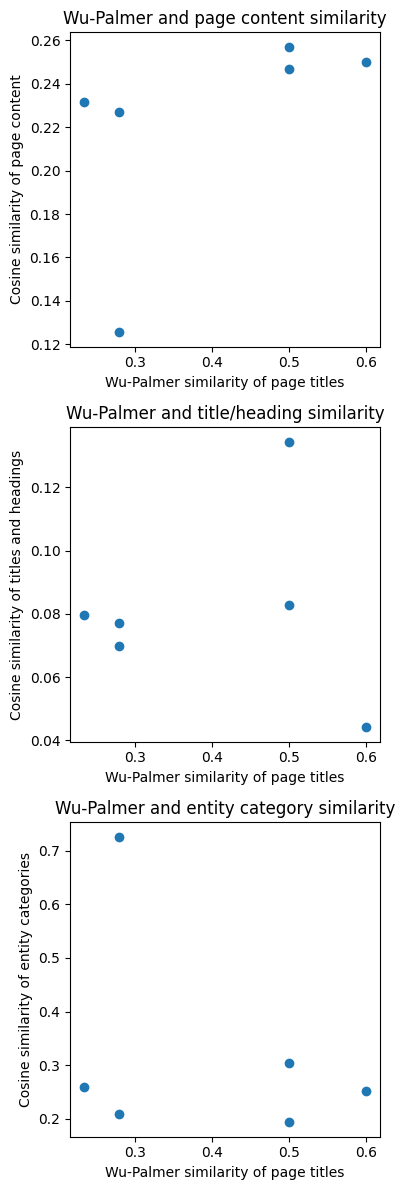

In [ ]:
import matplotlib.pyplot as plt

def sim_matrix_to_vector(matrix):
    vec = []
    for i, w1 in enumerate(KEYWORDS):
        for j, w2 in enumerate(KEYWORDS):
            if i < j:
                sim = matrix[i][j]
                vec.append(sim)
    return np.array(vec)

task_2_sim_vector = sim_matrix_to_vector(cosine_sims_task_2)
task_3_sim_vector = sim_matrix_to_vector(cosine_sims_task_3)
task_4_sim_vector = sim_matrix_to_vector(cosine_sims_task_4)
wup_sim_vector = sim_matrix_to_vector(wup_sims_averaged)

# Calculate correlation matrix and pick cross-correlations
corr_task_2 = np.corrcoef(task_2_sim_vector, wup_sim_vector)[0,1]
corr_task_3 = np.corrcoef(task_3_sim_vector, wup_sim_vector)[0,1]
corr_task_4 = np.corrcoef(task_4_sim_vector, wup_sim_vector)[0,1]

fig, ax = plt.subplots(3, 1, figsize=(4, 12))
ax[0].scatter(wup_sim_vector, task_2_sim_vector)
ax[0].set_title('Wu-Palmer and page content similarity')
ax[0].set_xlabel('Wu-Palmer similarity of page titles')
ax[0].set_ylabel('Cosine similarity of page content')
ax[1].scatter(wup_sim_vector, task_3_sim_vector)
ax[1].set_title('Wu-Palmer and title/heading similarity')
ax[1].set_xlabel('Wu-Palmer similarity of page titles')
ax[1].set_ylabel('Cosine similarity of titles and headings')
ax[2].scatter(wup_sim_vector, task_4_sim_vector)
ax[2].set_title('Wu-Palmer and entity category similarity')
ax[2].set_xlabel('Wu-Palmer similarity of page titles')
ax[2].set_ylabel('Cosine similarity of entity categories')
fig.tight_layout()

pd.DataFrame([corr_task_2, corr_task_3, corr_task_4], columns=['Wu-Palmer'], index=['page content', 'title/heading', 'entity category'])

6) Now we want to further extend the entity-based similarity in the following way. Write a script that scraps the content of each entity (using beautiful soup or any other scrapper of your choice) and retrieves all the entity-category (clickable keywords) identified during this first exploration stage. The process uses only a first pass exploration.

In [ ]:
import pickle
# Check if dictionary exists
try:
  with open('xd.pickle', 'rb') as handle:
    xd = pickle.load(handle)
except:
    xd = {}

disambiguation = 0
page_error = 0
length = len(pages)
i_dict = 1

for page_name, page in pages.items():
  print(f"Processing page {i_dict} of {length}")
  link_length = len(page.links)
  i_link = 1
  links = page.links
  xd[page_name] = []

  for link in links:
    if i_link != links:
      print(f"Processing link {i_link} of {link_length}", end='\r')
    else:
      print(f"Processing link {i_link} of {link_length}")

    if link in xd[page_name]:
      i_link += 1
      continue

    try:
      link_page = wikipedia.page(link, auto_suggest=False)
      xd[page_name].extend(link_page.links)
    except wikipedia.DisambiguationError:
      disambiguation += 1
      pass
    except wikipedia.PageError:
      page_error += 1
      pass

    print(' ' * len(f"Processing link {i_link} of {link_length}"), end='\r')

    i_link += 1

  i_dict += 1

print(xd)
print(f"Disambiguation Errors: {disambiguation}")
print(f"Page Errors: {page_error}")

# Save dictionary to file
with open('xd.pickle', 'wb') as handle:
    pickle.dump(xd, handle, protocol=pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


PageError: ignored

In [ ]:
# Check number of items in dictionary
sum = 0
# loop through each item in dictionary
for key, value in xd.items():
    print(key, len(value))
    sum += len(value)

print(sum)

7) Repeat the TfIdfVectorizer representation and recalculate the cosine similarity between individuals words of the four keywords in 1).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

keyword_vectorizer = TfidfVectorizer()
keywords_vectorized = keyword_vectorizer.fit_transform([' '.join(preprocess(w)) for w in KEYWORDS])

cosine_similarity_keywords = pd.DataFrame(cosine_similarity(keywords_vectorized, keywords_vectorized), columns=KEYWORDS, index=KEYWORDS)

print("Cosine Similarity between keywords:")
cosine_similarity_keywords

Cosine Similarity between keywords:


,nature,pollution,sustainability,environmentally friendly
nature,1.0,0.0,0.0,0.0
pollution,0.0,1.0,0.0,0.0
sustainability,0.0,0.0,1.0,0.0
environmentally friendly,0.0,0.0,0.0,1.0


8) Use the pretrained word2vec to represent each words and calculate the corresponding similarity.

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import numpy as np
keywords = pages.keys()

def wv_phrase(phrase):
    '''Calculates the w2v representation of a keyword

    For multiple words, calculates the average of the individual words.
    '''
    return np.mean(np.array([wv[w] for w in phrase.split(' ')]), axis=0)

word2vecs = [wv_phrase(w) for w in KEYWORDS]

cosine_similarity_keywords_wv = cosine_similarity(word2vecs, word2vecs)

print("Cosine Similarity between keywords in word2vec:")
pd.DataFrame(cosine_similarity_keywords_wv, columns=KEYWORDS, index=KEYWORDS)

Cosine Similarity between keywords in word2vec:


,nature,pollution,sustainability,environmentally friendly
nature,1.000000,0.106877,0.149798,0.254659
pollution,0.106877,1.000000,0.264319,0.305983
sustainability,0.149798,0.264319,1.000000,0.355711
environmentally friendly,0.254659,0.305983,0.355711,1.000000


-0.7725873133078435


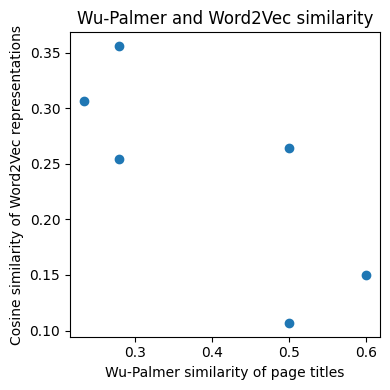

In [ ]:
# Let's make things interesting and find the correlation with Wu-Palmer similarity

keywords_wv_sims_vector = sim_matrix_to_vector(cosine_similarity_keywords_wv)

# Calculate correlation matrix and pick cross-correlations
corr_task_2 = np.corrcoef(keywords_wv_sims_vector, wup_sim_vector)[0,1]
print(corr_task_2)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(wup_sim_vector, keywords_wv_sims_vector)
ax.set_title('Wu-Palmer and Word2Vec similarity')
ax.set_xlabel('Wu-Palmer similarity of page titles')
ax.set_ylabel('Cosine similarity of Word2Vec representations')
fig.tight_layout()

9) Now we want to consider the news around each of these keywords. Select a news forum of your choice and write a script that retrieves documents for each keyword. Ensure that you collect sufficiently enough data (few hundreds) various time periods. Create a dabaset where you store documents for each keyword for each time period according to your time subdivision of your own. Use WordCloud library to display the world cloud representation of news textual data associated to each keyword.

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta
import itertools

def urls_for_keyword(keyword, interval_years=1, start_date=datetime.date.today()):
    '''Creates an infinite iterator of search URLs in reverse chronological order'''
    while True:
        end_date = start_date
        start_date = end_date - relativedelta(years=interval_years)
        yield f'https://www.nytimes.com/search?dropmab=false&endDate={end_date.isoformat()}&query={keyword}&sort=best&startDate={start_date.isoformat()}&types=article'

#for url in itertools.islice(urls_for_keyword('pollution', start_date=datetime.date.fromisoformat('2023-10-31'), interval_years=20), 10):
#    print(url)

https://www.nytimes.com/search?dropmab=false&endDate=2023-10-31&query=pollution&sort=best&startDate=2003-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=2003-10-31&query=pollution&sort=best&startDate=1983-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1983-10-31&query=pollution&sort=best&startDate=1963-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1963-10-31&query=pollution&sort=best&startDate=1943-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1943-10-31&query=pollution&sort=best&startDate=1923-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1923-10-31&query=pollution&sort=best&startDate=1903-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1903-10-31&query=pollution&sort=best&startDate=1883-10-31&types=article
https://www.nytimes.com/search?dropmab=false&endDate=1883-10-31&query=pollution&sort=best&startDate=1863-10-31&types=article


In [ ]:
import http.client
import json

conn = http.client.HTTPSConnection("abcnews.go.com")
news = {}

# Get the first 20 pages of search results
for keyword in KEYWORDS:
    news[keyword] = []

    for page in range(1, 51):
        conn.request("GET", f"/meta/api/search?sort=&type=Story&section=GMA&offset={page*10}&q={keyword.replace(' ', '%20')}")
        res = conn.getresponse()
        data = res.read()

        try:
            # Convert JSON response to Python dictionary
            data_dict = json.loads(data)
        except json.decoder.JSONDecodeError:
            print(res.status, res.reason)
            break

        # Get the links from the response
        for item in data_dict["item"]:
            if "/shop/" not in item["link"]:
                news[keyword].append({"link": item["link"], "pubDate": item["pubDate"]})

        if len(news[keyword]) >= 75:
            break

print(news)
for keyword, articles in news.items():
    print(f"{len(articles)} articles found for {keyword}")


{'nature': [{'link': 'https://www.goodmorningamerica.com/travel/story/woman-gored-bison-sparks-warnings-nature-lovers-91768853', 'pubDate': 'Fri, 21 Oct 2022 11:37:00 +0000'}, {'link': 'https://www.goodmorningamerica.com/culture/story/princes-charles-william-harry-guys-night-planet-premiere-62164238', 'pubDate': 'Thu, 04 Apr 2019 19:11:00 +0000'}, {'link': 'https://www.goodmorningamerica.com/living/story/after-attack-gunpoint-woman-turns-trauma-garden-healing-103164589', 'pubDate': 'Thu, 14 Sep 2023 19:09:00 +0000'}, {'link': 'https://www.goodmorningamerica.com/culture/story/duchess-kate-brings-kids-enjoy-garden-designed-early-63138791', 'pubDate': 'Sun, 19 May 2019 21:57:00 +0000'}, {'link': 'https://www.goodmorningamerica.com/style/story/mother-daughter-duo-embracing-ancient-botanical-ingredients-skin-76602786', 'pubDate': 'Mon, 29 Mar 2021 08:04:00 +0000'}, {'link': 'https://www.goodmorningamerica.com/culture/story/duchess-kate-queen-elizabeth-ii-tour-chelsea-flower-63171149', 'pubD

In [ ]:
import requests
from bs4 import BeautifulSoup
from time import sleep

news = {}
headers = {"User-Agent": "Mozilla/5.0"}
time_periods = (2000, 2006, 2012, 2018)

for keyword in KEYWORDS:
    news[keyword] = {}

    for time_period in time_periods:
        news[keyword][time_period] = {
            "web_url": [],
            "pub_date": [],
            "keywords": [],
            "headline": [],
            "abstract": [],
            "lead_paragraph": []
        }

        # 10 articles per page
        for page in range(1, 21):
            res = requests.get(f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q={keyword.replace(' ', '%20')}&api-key={KEY}&page={page}&begin_date={time_period}0101&end_date={time_period+5}1231")
            try:
                articles = res.json()["response"]
            except KeyError:
                if res.status_code == 429:
                    print("Rate limited")
                    break
            except TimeoutError:
                break

            for article in articles["docs"]:
                news[keyword][time_period]["web_url"].append(article["web_url"])
                news[keyword][time_period]["pub_date"].append(article["pub_date"])
                news[keyword][time_period]["keywords"].append(article["keywords"])
                news[keyword][time_period]["headline"].append(article["headline"]["main"])
                news[keyword][time_period]["abstract"].append(article["abstract"])
                news[keyword][time_period]["lead_paragraph"].append(article["lead_paragraph"])

                # try:
                #     # res = requests.get(article["web_url"], headers=headers)
                #     # data = res.text

                #     soup = BeautifulSoup(data, 'html.parser')
                #     article_soup = soup.find('section', {'name': 'articleBody'})
                #     paragraphs_soup = article_soup.find_all('p')
                #     text = ' '.join(paragraph.text for paragraph in paragraphs_soup)
                #     news[keyword]["text"] = text

                #     sleep(5)
                # except AttributeError:
                #     # Rate limited
                #     print(article["web_url"])
                #     print(soup)
                #     pass

            sleep(12)

print(news)

import pickle
# Save dictionary to file
with open('news_nyt.pickle', 'wb') as handle:
    pickle.dump(news, handle, protocol=pickle.HIGHEST_PROTOCOL)


Rate limited
Rate limited
Rate limited
Rate limited
{'nature': {'web_url': 'https://www.nytimes.com/2023/06/20/sports/football/cte-study-concussions-brain-tackle.html', 'pub_date': '2023-06-20T09:01:36+0000', 'keywords': [{'name': 'subject', 'value': 'Football', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'Sensors', 'rank': 2, 'major': 'N'}, {'name': 'subject', 'value': 'Research', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Concussions', 'rank': 4, 'major': 'N'}, {'name': 'subject', 'value': 'Chronic Traumatic Encephalopathy', 'rank': 5, 'major': 'N'}, {'name': 'subject', 'value': 'Sports Injuries', 'rank': 6, 'major': 'N'}, {'name': 'subject', 'value': 'Brain', 'rank': 7, 'major': 'N'}, {'name': 'organizations', 'value': 'Nature Communications (Journal)', 'rank': 8, 'major': 'N'}], 'headline': 'Collective Force of Head Hits, Not Just the Number of Them, Increases Odds of C.T.E.', 'abstract': 'The largest study of chronic traumatic encephalopathy to date found t

10) Repeat the calculus of the TfIdfVectorizer based similarity among each pair at each time interval.

11) Comment on the results using appropriate literature

12) Suggest a GUI that would enable you to illustrate the functioning of the various specification of your project.